# Neural Network for Handwritten Digits Classification

Link to the Youtube Video Tutorial: https://www.youtube.com/watch?v=iqQgED9vV7k&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=7

**The range of pixel value for a binary image:**  <br />
1) Dark = 0  <br />
2) White = 255  <br />
<img src="hidden\pixelrange.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />

**The theory behind the neural network (For simplicity, the neural network With only 2 layers: input layer & output layer):**  <br />
1) The input image has dimension of 28x28 (The pixel values of the image are stored in 2D array) 
2) The input image (pixel values) should be flatten into a 1D array before the neural network can learn its features. 
3) After flattening the input image of 28x28 dimension, the flattened image is made up of 28*28=784 pixels/elements in a 1D array.
4) Hence, the input/first layer of the neural network should consist of 28*28=784 neurons (means each neuron in the input/first layer of the neural network only responsible to process a feature/pixel of the input image [EG: neuron x1 only process feature/pixel 1 of the input image]). Hence, the features of the input image can be propagateed into the neural network.  <br />
5) Each neuron in the input layer is connected with each neuron in the output layer.  <br />
6) We can add hidden layers between the input and output layers of the neural networks.  <br />
7) Since the dataset consists label/ground truth (dependent variable) of values ranging from value 0 to 9, the output layer consists of 10 output neurons/elements. Each output neuron corresponds to a label (EG: Output neuron 1 corresponds to label '0').  After prediction of an image is made, each output neuron will provide its prediction score, while the label corresponding to the output neuron with the highest score is the predicted label of the image.    <br />
<img src="hidden\theory.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />

In [67]:
import tensorflow as tf
from tensorflow import keras
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Data Exploration

The number of samples(images) in train set: 60000
The number of samples(images) in test set: 10000
The shape of each sample(image) in the dataset: (28, 28)
The pixel values of the first sample(image) in the train set:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225

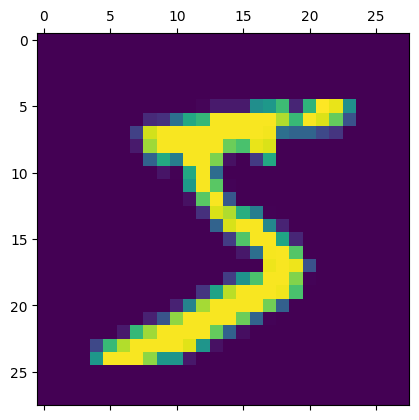

In [68]:
# Load the train and test sets (already assigned by Keras) of the digits dataset of Keras into the variables respectively
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

print('The number of samples(images) in train set:', len(X_train))
print('The number of samples(images) in test set:', len(X_test))
# Each sample of the dataset is a 28 x 28 image, means each sample/image has 28*28=784 pixels.
print('The shape of each sample(image) in the dataset:', X_train[0].shape)
# Each pixel value of an image is ranging from 0 (black) to 255 (white)
print('The pixel values of the first sample(image) in the train set:\n', X_train[0])
# Plot/visualize the first sample/image in the train set
plt.matshow(X_train[0])

In [69]:
print('The label/target/value of the first sample(image) in the train set:\n', Y_train[0])

The label/target/value of the first sample(image) in the train set:
 5


# Data Preprocessing

In [70]:
print('The train set consists of '+ str(X_train.shape[0]) + ' samples/images while each sample is an image of ' 
      + str(X_train.shape[1]) + ' x ' + str(X_train.shape[2]) + ' dimensions/sizes.')

The train set consists of 60000 samples/images while each sample is an image of 28 x 28 dimensions/sizes.


## Scale the features (independent variable)

In [71]:
# Scale the values of features (independent variable) in the range of 0 to 1 (since each pixel can have maximum value of 255, divide the whole array (all pixel values of the array) with 255) before training to get high accuracy
X_train = X_train / 255
X_test = X_test / 255

## Flatten images of the dataset (Reshape the features/independent variable of images into 1D array)

In [72]:
# The most simplest way to reshape the images: X_train_flattened = X_train.reshape(len(X_train),28*28)
# The line below is the general way to reshape the images:

# Reshape images in train set
X_train_flattened = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]) 
print('There are ' + str(X_train_flattened.shape[0]) + 
      ' flattened images in the train set, while each flattened image in the train set contain ' 
      + str(X_train_flattened.shape[1]) + ' pixels in 1D array.')

# Reshape images in test set
X_test_flattened = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]) 
print('There are ' + str(X_test_flattened.shape[0]) + 
      ' flattened images in the test set, while each flattened image in the test set contain ' 
      + str(X_test_flattened.shape[1]) + ' pixels/elements in 1D array.')

There are 60000 flattened images in the train set, while each flattened image in the train set contain 784 pixels in 1D array.
There are 10000 flattened images in the test set, while each flattened image in the test set contain 784 pixels/elements in 1D array.


### Visualization of pixel information of an image (Before and after flattening) 

In [73]:
# Pixel information of first image in train set (Before flattening), in 2D array of size 28 x 28.
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [74]:
# Pixel information of first image in train set (After flattening), in 1D array of 28*28=784 elements.
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Develop a neural network (model), without hidden layer

**The representation of the neural network (With only 2 layers: input layer & output layer):**  <br />
1) The input layer consists of 28*28=784 elements  <br />
2) The output layer consists of 10 elements (Because the dataset consists label(dependent variable) of values ranging from value 0 to 9)  <br />
3) Each neuron in the input layer is connected with each neuron in the output layer  <br />
<img src="hidden\simple_neural_network.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />


In [75]:
'''
1) Sequential() means you will have a stack of layers in your neural network and since it is a stack, it will accept every layer as one element
2) Dense means each neuron in one layer is connected with each neuron in the next layer
3) Optimizer allows you to train the neural network efficiently. Basically when the backward propagation and the training is going on, optimizer will allow you to reach to the global optima in efficient way.
4) We use this loss function because our output class(dependent variable) is categorical (EG: category 0 to 9). Sparse means our output variable which samples in Y_train is actually an integer number.If it is one-hot-encoded array, you would probably use categorical cross entropy.
5) Epoch is like the number of iteration for which the neural network is going to run the training.
6) Often in machine learning, you need to scale the values of features (dependent variable) in the range of 0 to 1 before training to get high accuracy.
7) Scaling is a technique that improves on the accuracy of machine learning model.
8) During training, the accuracy of the model is evaluated using train set.
'''
# Define the neural network and store it to the variable called model
model = keras.Sequential([
    #1) Develop the first element and second (last) element of the neural network: input layer and output layer
    #2) We don't have a separate line to define the input layer. Instead, we define the input layer by specifying the number of elements of input layer directly at the line which defines the layer right after the input layer.
    #2) keras.layers.Dense(Number of elements of output layer= Shape of the output layer, input_shape(Number of elements of input layer=Number of elements/pixels in 1D array of an flattened image,),activation='Type of activation function')    
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

# After defining a neural network, you need to compile it & pass a bunch of arguments
model.compile(
    optimizer='adam', # using adam optimizer. 
    loss='sparse_categorical_crossentropy', # the loss function used is sparse categorical cross entropy. 
    metrics=['accuracy'] # the metric used is accuracy. In this case, when the neural network is compiling, my goal is to make the neural network more accurate.
)

c:\Users\weiyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train the neural network (model)

In [76]:
# Train the neural netwok with train set (use the flattened image data) and 5 epochs. 
model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8120 - loss: 0.7225
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9131 - loss: 0.3082
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9225 - loss: 0.2799
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9250 - loss: 0.2706
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9265 - loss: 0.2623


### Test the neural network (model)

Before deploying a model to a production, we always evaluate the accuracy of the model using test set

In [77]:
# Test the neural netwok with test set (use the flattened image data)
print('The accuracy of the model: ',model.evaluate(X_test_flattened,Y_test)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9165 - loss: 0.3015
The accuracy of the model:  0.9273999929428101


### Make predictions using the neural network (model)

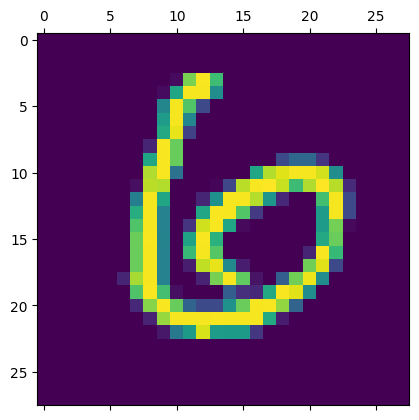

In [78]:
# Visualize the 12th image of the test set (using the unflattened image data)
plt.matshow(X_test[11])

There will be 10 scores (1 score per label) when predicting an image because our dataset consists labels ranging from 0 to 9 (In other words, it means we have 10 possible classification result for each image prediction, ranging from value 0 to 9)

In [79]:
# Due to the restriction of array size, we need to predict for all flatten images in a variable first, before accessing the prediction results of a particular flatten image.
Y_predicted = model.predict(X_test_flattened)

print('The prediction results of the 12th image in the test set:\n',Y_predicted[11])

# According to the prediction results of the 12th image in the test set, label '6' has the highest score among others, so the image is predicted to be value of 6. 
print('\nIn other words, the [label] -> [score]:')
print('0 -> ', Y_predicted[11,0])
print('1 -> ', Y_predicted[11,1])
print('2 -> ', Y_predicted[11,2])
print('3 -> ', Y_predicted[11,3])
print('4 -> ', Y_predicted[11,4])
print('5 -> ', Y_predicted[11,5])
print('6 -> ', Y_predicted[11,6])
print('7 -> ', Y_predicted[11,7])
print('8 -> ', Y_predicted[11,8])
print('9 -> ', Y_predicted[11,9])

# Find the maximum value of the array and print the index of that maximum value using argmax(). The index is the predicted label of the image in this case.
print('\nThe predicted label of the image: ',np.argmax(Y_predicted[11]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
The prediction results of the 12th image in the test set:
 [5.2148993e-03 1.1220557e-03 1.8662070e-01 2.6348071e-02 6.8576504e-03
 1.6750233e-03 8.9807016e-01 1.4479391e-05 2.3861575e-01 3.5808625e-04]

In other words, the [label] -> [score]:
0 ->  0.0052148993
1 ->  0.0011220557
2 ->  0.1866207
3 ->  0.026348071
4 ->  0.0068576504
5 ->  0.0016750233
6 ->  0.89807016
7 ->  1.4479391e-05
8 ->  0.23861575
9 ->  0.00035808625

The predicted label of the image:  6


## Evaluate the performance of the neural network (model)

In [80]:
# Create a new array out of existing array by using for loop,
# to get the predicted labels of test set images and store them into the newly created array
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]



## Generate the confusion matrix of the neural network (model)

In [81]:
# tf.math.confusion_matrix(labels= the array stores the test set ground truth label (dependent variable), predictions=the array stores the test set predicted labels (prediction results))
cm = tf.math.confusion_matrix(labels=Y_test, predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    5,   10,    3,    2,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   3,    9,  936,   13,    7,    4,   12,   11,   34,    3],
       [   2,    0,   22,  921,    0,   24,    2,   12,   20,    7],
       [   1,    2,    5,    2,  907,    0,   13,    4,    9,   39],
       [   7,    3,    2,   34,    9,  778,   16,    8,   29,    6],
       [   7,    3,    5,    1,    7,   14,  918,    2,    1,    0],
       [   1,    6,   22,    6,    6,    0,    0,  963,    2,   22],
       [   5,   11,    7,   23,    9,   27,    9,   13,  865,    5],
       [   9,    7,    2,   10,   24,    8,    0,   30,    7,  912]])>

## Visualize the confusion matrix of the neural network (model)

Text(95.72222222222221, 0.5, 'Ground Truth')

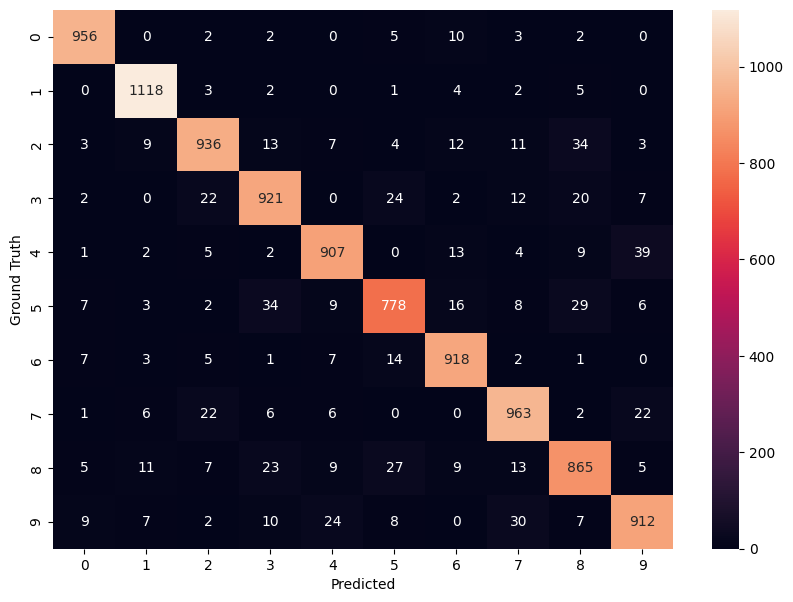

In [82]:
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

# The values that are not in the diagonal represents the number of errors in predicting the particular value.

# Develop a neural network, with hidden layer

Generally, as you add hidden layer to a neural network:
1) The performance of the neural network tends to improve.
2) The neural network will take some more time to train, because now it has to do more computation.

In [83]:
# Define the neural network and store it to the variable called model_whidden
model_whidden = keras.Sequential([
    # Develop the first & second element of the neural network in one line: input layer & a hidden layer
    #1) When the neural network has hidden layer, we need to specify the number of neurons in the hidden layer connected right after the previous layer
    #2) Usually, you should trial and error to specify the number of neurons in hidden network (start with some value which is less than the input shape)
    #3) We don't have a separate line to define the input layer. Instead, we define the input layer by specifying the number of elements of input layer directly at the line which defines the layer right after the input layer.
    #4) keras.layers.Dense(Number of neurons in the next hidden layer, input_shape(Number of elements of input layer=Number of elements/pixels in 1D array of an flattened image,),activation='Type of activation function')    
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),

    #Develop the third element of the neural network: output layer
    #1) The output layer doesn't need the input shape parameter because whatever previous layer it is connected, it knows how to figure out the input shape from that
    #2) keras.layers.Dense(Number of elements of output layer= Shape of the output layer, activation='Type of activation function')    
    keras.layers.Dense(10, activation='sigmoid')
])

# After defining a neural network, you need to compile it & pass a bunch of arguments
model_whidden.compile(
    optimizer='adam', # using adam optimizer. 
    loss='sparse_categorical_crossentropy', # the loss function used is sparse categorical cross entropy. 
    metrics=['accuracy'] # the metric used is accuracy. In this case, when the neural network is compiling, my goal is to make the neural network more accurate.
)

c:\Users\weiyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Train the neural network (model)

In [84]:
# Train the neural netwok with train set (use the flattened image data) and 5 epochs. 
model_whidden.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8668 - loss: 0.4654
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9608 - loss: 0.1343
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9750 - loss: 0.0878
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9812 - loss: 0.0615
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9853 - loss: 0.0483


## Test the neural network  (model)

Before deploying a model to a production, we always evaluate the accuracy of the model using test set

In [85]:
# Test the neural netwok with test set (use the flattened image data)
print('The accuracy of the model: ',model_whidden.evaluate(X_test_flattened,Y_test)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9717 - loss: 0.0926
The accuracy of the model:  0.9757000207901001


## Make prediction using the neural network (model)

In [86]:
Y_predicted_whidden = model_whidden.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Evaluate the performance of the neural network (model)

In [87]:
# Create a new array out of existing array by using for loop,
# to get the predicted labels of test set images and store them into the newly created array
Y_predicted_labels_whidden = [np.argmax(i) for i in Y_predicted_whidden]

## Generate the confusion matrix of the neural network (model)

In [88]:
# tf.math.confusion_matrix(labels= the array stores the test set ground truth label (dependent variable), predictions=the array stores the test set predicted labels (prediction results))
cm_whidden = tf.math.confusion_matrix(labels=Y_test, predictions=Y_predicted_labels_whidden)
cm_whidden

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    1,    1,    1,    0,    1,    0,    2,    1],
       [   0, 1127,    1,    1,    0,    1,    2,    0,    3,    0],
       [   5,    2,  998,   10,    2,    0,    2,    3,    9,    1],
       [   0,    0,    4,  992,    0,    1,    0,    4,    5,    4],
       [   1,    0,    2,    0,  967,    0,    4,    0,    2,    6],
       [   2,    0,    0,   22,    1,  853,    4,    1,    7,    2],
       [   4,    3,    0,    1,    4,    5,  935,    1,    5,    0],
       [   1,    6,    7,    4,    4,    0,    0,  985,    7,   14],
       [   0,    0,    2,    7,    4,    2,    0,    2,  954,    3],
       [   2,    3,    0,   13,    7,    0,    1,    4,    5,  974]])>

## Visualize the confusion matrix of the neural network (model)

By observing the confusion matrix of the neural network with hidden layer, its numbers in non diagonal boxes are less than the one without hidden layer (means error becomes less, accuracy improved)

Text(95.72222222222221, 0.5, 'Ground Truth')

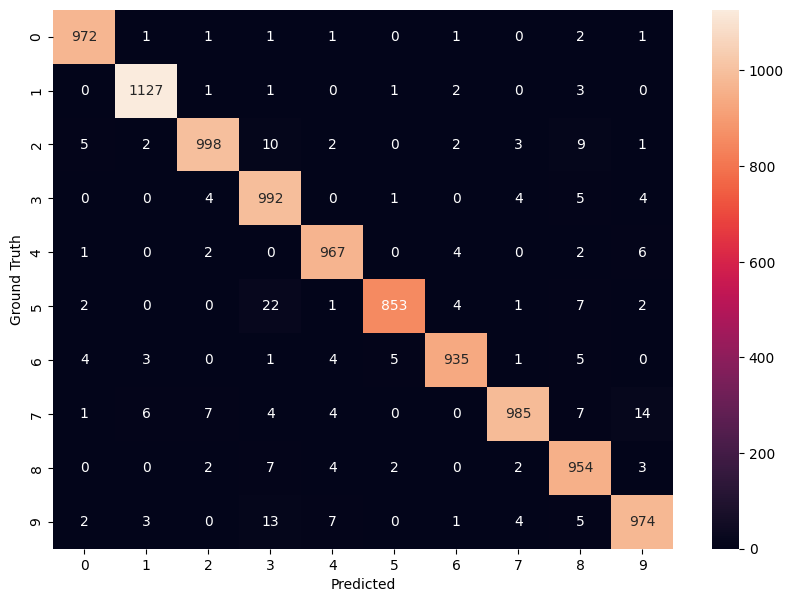

In [89]:
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(cm_whidden, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

# The values that are not in the diagonal represents the number of errors in predicting the particular value.

# Develop a neural network, with hidden layer, without flatten images manually (Instead, using Flatten())

1) The value of weights and bias is called parameter
2) The optimizer, loss, metrics, epochs, learning rate,... etc are called hyperparameters, because they control/affect the parameters (weigths & bias) 

In [90]:
# Define the neural network and store it to the variable called model_whidden
model_whidden_wflatkeras = keras.Sequential([
    # Call a function to flatten image automatically & define the input layer of the neural network
    # Flatten the images automatically using Flatten() of keras, only need to supply images whose pixel information is in 2D array. Hence, you don't have to create a flattened array (flattened images) manually.
    # keras.layers.Flatten(input_shape=(dimension of images in the dataset)
    keras.layers.Flatten(input_shape=(28,28)),
    # Develop the second element of the neural network: a hidden layer
    #1) When the neural network has hidden layer, we need to specify the number of neurons in the hidden layer connected right after the previous layer
    #2) Usually, you should trial and error to specify the number of neurons in hidden network (start with some value which is less than the input shape)
    #3) The hidden layer doesn't need the input shape parameter because whatever previous layer it is connected, it knows how to figure out the input shape from that
    #4) keras.layers.Dense(Number of neurons in the next hidden layer, input_shape(Number of elements of input layer=Number of elements/pixels in 1D array of an flattened image,),activation='Type of activation function')    
    keras.layers.Dense(100,activation='relu'),

    #Develop the third element of the neural network: output layer
    #1) The output layer doesn't need the input shape parameter because whatever previous layer it is connected, it knows how to figure out the input shape from that
    #2) keras.layers.Dense(Number of elements of output layer= Shape of the output layer, activation='Type of activation function')    
    keras.layers.Dense(10, activation='sigmoid')
])

## New codes added here:
log_dir = "logs_adam/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# After defining a neural network, you need to compile it & pass a bunch of arguments
model_whidden_wflatkeras.compile(
    optimizer='adam', # using adam optimizer. 
    loss='sparse_categorical_crossentropy', # the loss function used is sparse categorical cross entropy. 
    metrics=['accuracy'] # the metric used is accuracy. In this case, when the neural network is compiling, my goal is to make the neural network more accurate.
)



c:\Users\weiyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Train the neural network (model)

In [91]:
# Train the neural netwok with train set (use the unflattened image data) and 5 epochs. 
model_whidden_wflatkeras.fit(X_train, Y_train, epochs=5, callbacks=[tensorboard_callback])

# Method 1 to use TensorBoard)--------------(Run the codes below if want to show the TensorBoard in VS code)--------------
#%load_ext tensorboard # Load the TensorBoard notebook extension 
## Run tensorboard with the log files located at absolute_path_to_the_folder_containing_logfiles
#%tensorboard --logdir=D:\Python_Master_New\Deep_Learning_Tutorials_codebasics\NeuralNetwork_Handwritten_Digits_Classification_codebasics\logs_adam

# Method 2 to use TensorBoard)--------------(Run the codes below at the terminal, then copy & paste the link provided, if want to show the TensorBoard on website)--------------
#tensorboard --logdir=D:\Python_Master_New\Deep_Learning_Tutorials_codebasics\NeuralNetwork_Handwritten_Digits_Classification_codebasics\logs_adam


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8733 - loss: 0.4496
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9604 - loss: 0.1362
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9724 - loss: 0.0942
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9798 - loss: 0.0680
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9842 - loss: 0.0520
